## Classifying Iris species

In [1]:
# meeting data
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
# print type and shape of data
print(f'shape of data: {iris_dataset["data"].shape}, type of data: {type(iris_dataset["data"])}')

shape of data: (150, 4), type of data: <class 'numpy.ndarray'>


In [3]:
# print type of target
print(f'shape of target: {iris_dataset["target"].shape}, type of target: {type(iris_dataset["target"])}')

shape of target: (150,), type of target: <class 'numpy.ndarray'>


In [4]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [5]:
# printing shapes of train dataset
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [6]:
# printing shaeps of test dataset
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [7]:
# exploring the data
# create dataframe from data in X_train
# label the columns  using the strings in iris_dataset.feature_names
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

In [8]:
iris_dataframe['species'] = y_train

In [9]:
import numpy as np
def species_to_string(integer):
    if integer == 0:
        return 'setosa'
    elif integer == 1:
        return 'virginica'
    elif integer == 2:
        return 'versicolor'
    else:
        return np.nan
    
iris_dataframe['species'] = iris_dataframe['species'].apply(species_to_string)

In [10]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.9,3.0,4.2,1.5,virginica
1,5.8,2.6,4.0,1.2,virginica
2,6.8,3.0,5.5,2.1,versicolor
3,4.7,3.2,1.3,0.2,setosa
4,6.9,3.1,5.1,2.3,versicolor
...,...,...,...,...,...
107,4.9,3.1,1.5,0.1,setosa
108,6.3,2.9,5.6,1.8,versicolor
109,5.8,2.7,4.1,1.0,virginica
110,7.7,3.8,6.7,2.2,versicolor


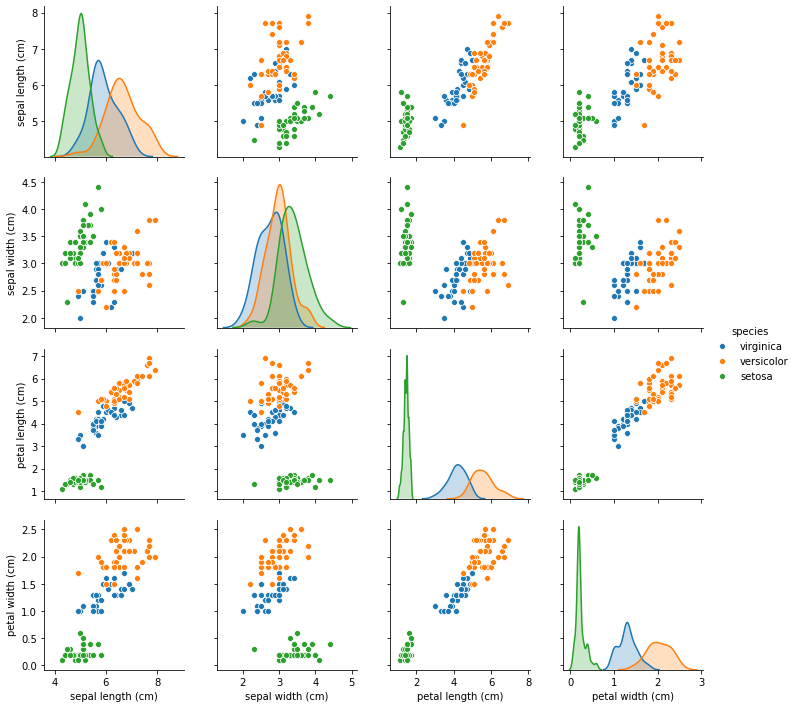

In [11]:
# create a scatter matrix from the dataframe
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris_dataframe, hue = 'species')
plt.show()

In [12]:
# From the plots, we can see that the three classes seem to be relatively well separated
# using the sepal and petal measurements. This means that a machine learning model
# will likely be able to learn to separate them.

### Building first K-Nearest Neighbors model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [14]:
# fit the model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
# The fit method returns the knn object itself (and modifies it in place), so we get a
# string representation of our classifier. The representation shows us which parameters
# were used in creating the model.

In [16]:
# evaluating the model
y_pred = model.predict(X_test)

In [17]:
# print test predictions
print(f'test set predictions:\n{y_pred}')

test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [18]:
# print score
print(f'test set score: {model.score(X_test, y_test):.2f}')

test set score: 0.97


In [19]:
# summary
# The pipe for modeling a machine learning problem
# or dataset is:
# 1. Load data and know it's characteristics
# 2. Clean or Wrangle data to proper data types
# 3. Visualize/Explore the data
# 4. Split data into Training/Test sets
# 5. Choose a convenient model for the data
# 6. Train the model on the training set
# 7. Evaluate the model on the test set